This notebook implements the dictionary trick as defined in Caligiuri et al. 2023

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import random


import numpy as np

# Algorithm steps

1) Generate G1 as ER(p)
2) iteratively construct Gk+1 from Gk by rewiring a link that 
    (i) has not been rewired in any previous iteration of the algorithm, 
    (ii) into a place that did not have a link in any previous iteration of the algorithm



In [4]:
n = 6  # 10 nodes
p = 0.5
seed = 20160  # seed random number generators for reproducibility
random.seed(seed)
# Use seed for reproducibility
G1 = nx.erdos_renyi_graph(n, p, seed=seed)
G_fully_connected = nx.complete_graph(n)



L = 6 # Length of dictionary

D = [None]*L # Dictionary proper
D[0] = G1

# Defines the history of edge rewiring
links_original = G1.edges
links_fully_connected = G_fully_connected.edges
links_net_yet_connected = list(links_fully_connected - links_original)


links_original = [key for key in links_original.keys()]
links_fully_connected = [key for key in links_fully_connected.keys()]

for i in range(1, L):
    # New graph iteration
    D[i] = D[i-1].copy()

    
    link_to_remove = random.choice(links_original)
    link_to_add = random.choice(links_net_yet_connected)

    # Rewire the new graph
    D[i].remove_edge(v=link_to_remove[0], u=link_to_remove[1]) 
    D[i].add_edge(link_to_add[0], link_to_add[1])

    links_original.remove(link_to_remove) # I can no longer remove this link
    links_net_yet_connected.remove(link_to_add) # I can no longer add this link



[<networkx.classes.graph.Graph object at 0x7f56f347e2f0>, <networkx.classes.graph.Graph object at 0x7f56f347e740>, <networkx.classes.graph.Graph object at 0x7f56f347e380>, <networkx.classes.graph.Graph object at 0x7f56f347fa90>, <networkx.classes.graph.Graph object at 0x7f56f347eda0>, <networkx.classes.graph.Graph object at 0x7f56f347fca0>]


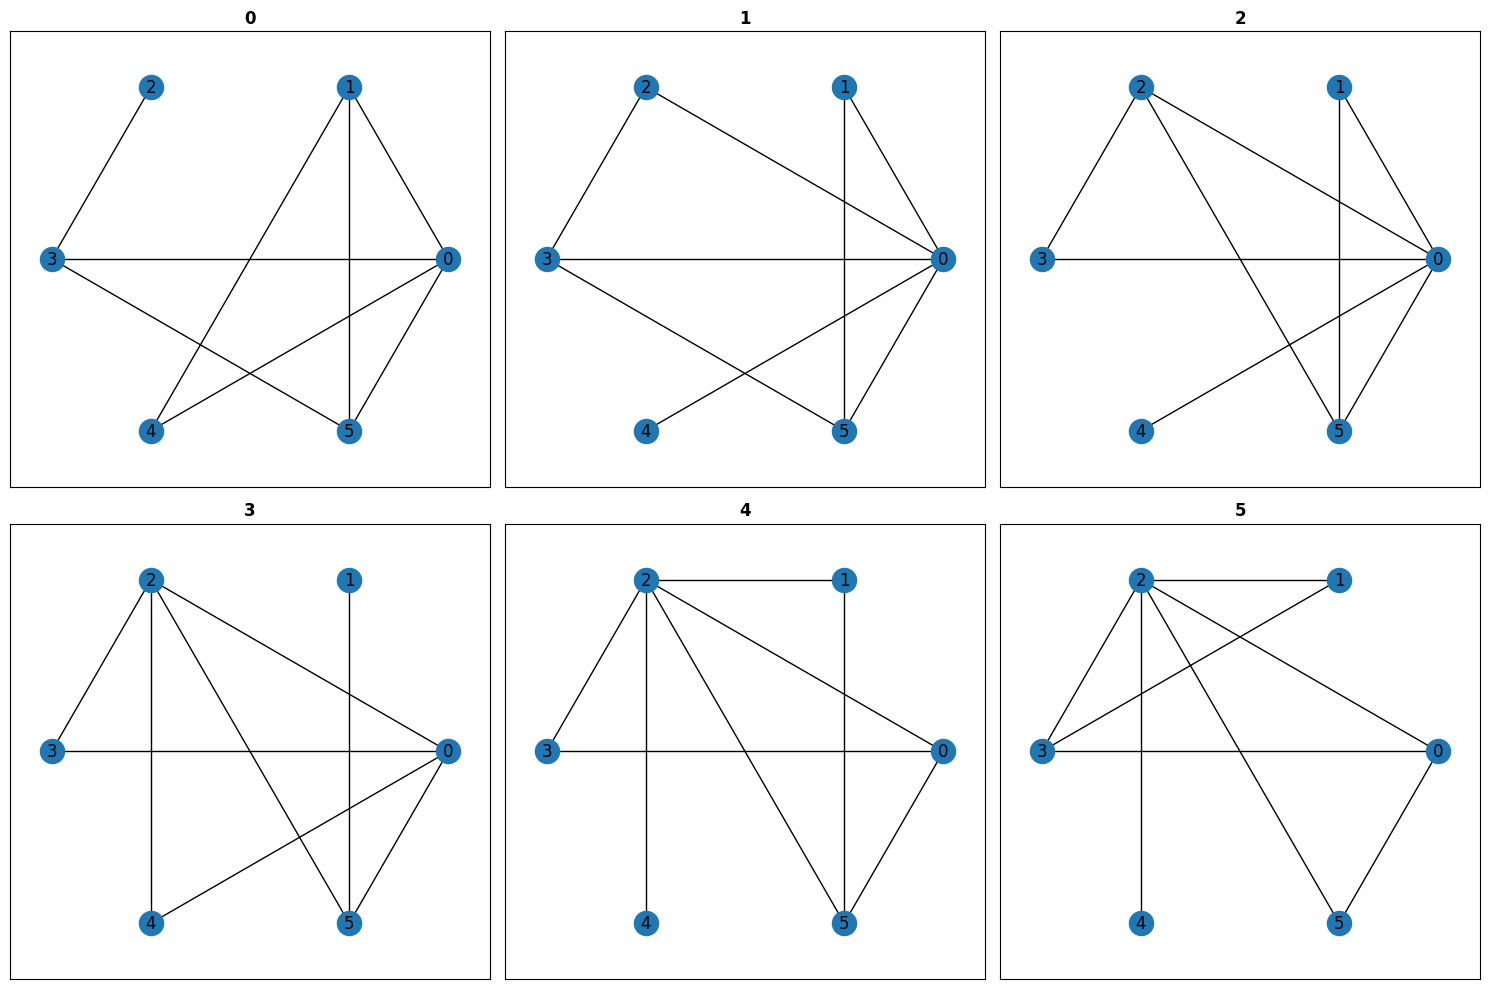

In [6]:

    
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10), dpi=100)
axs = np.ravel(axs)

for iG, G in zip(range(len(D)), D):

    axs[iG].axis('equal')

    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos, ax=axs[iG])

    axs[iG].set_title(f"{iG}", fontweight="bold")
    axs[iG].set_xticks([])
    axs[iG].set_yticks([])


fig.tight_layout()
plt.show()
